In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

In [3]:
all_image_path=glob.glob('2_class/*/*.jpg')##讀取

In [4]:
import random

In [5]:
random.shuffle(all_image_path)## 亂序

In [6]:
all_image_path[-5:]

['2_class\\airplane\\airplane_057.jpg',
 '2_class\\airplane\\airplane_603.jpg',
 '2_class\\airplane\\airplane_599.jpg',
 '2_class\\airplane\\airplane_276.jpg',
 '2_class\\lake\\lake_181.jpg']

In [7]:
label_to_index={'airplane':0,'lake':1}

In [8]:
###將字典airplane與0...互換
index_to_label=dict((v,k)for k,v in label_to_index.items())  ###後面用的到 0要轉換回airplane....

In [9]:
label_to_index

{'airplane': 0, 'lake': 1}

In [10]:
index_to_label

{0: 'airplane', 1: 'lake'}

In [11]:
img=all_image_path[0]

In [12]:
all_image_path[0]

'2_class\\lake\\lake_218.jpg'

In [13]:
img.split('\\')  ###用\\進行分割創建列表

['2_class', 'lake', 'lake_218.jpg']

In [14]:
img.split('\\')[1]   ####取出 lake=label

'lake'

In [15]:
label_to_index.get(img.split('\\')[1])     ###使用字典將 lake轉換成1

1

In [16]:
all_labels=[label_to_index.get(img.split('\\')[1]) for img in all_image_path]  ###應用到所有的label

In [17]:
all_labels[-5:]

[0, 0, 0, 0, 1]

In [18]:
all_image_path[-5:]                    ########獲得label和data 路徑

['2_class\\airplane\\airplane_057.jpg',
 '2_class\\airplane\\airplane_603.jpg',
 '2_class\\airplane\\airplane_599.jpg',
 '2_class\\airplane\\airplane_276.jpg',
 '2_class\\lake\\lake_181.jpg']

###讀取圖片

In [19]:
img=all_image_path[0]

In [20]:
img_raw = tf.io.read_file(img)     ###讀取

In [21]:
img_tensor=tf.image.decode_jpeg(img_raw) ###解碼

In [22]:
img_tensor.shape

TensorShape([256, 256, 3])

In [23]:
img_tensor.dtype

tf.uint8

In [24]:
img_tensor=tf.cast(img_tensor,tf.float32)  ##轉換成float32

In [25]:
img_tensor.dtype

tf.float32

In [26]:
img_tensor=img_tensor/255  ##規一

In [27]:
def load_img(path):
    img_raw = tf.io.read_file(path)             ###讀取
    img_tensor=tf.image.decode_jpeg(img_raw,channels=3)   ###解碼#解碼時彩色channels=3
    img_tensor=tf.image.resize(img_tensor,[256,256])  ###將所有圖片轉換成同樣大小
    img_tensor=tf.cast(img_tensor,tf.float32)  ##轉換成float32
    img_tensor=img_tensor/255  ##規一
    
    return img_tensor
    

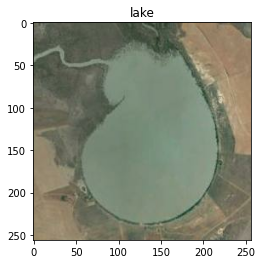

In [28]:
i = random.choice(range(len(all_image_path)))
img_path=all_image_path[i]
label=all_labels[i]
img_tensor=load_img(img_path)

plt.title(index_to_label.get(label))
plt.imshow(img_tensor.numpy())

In [29]:
img_datas=tf.data.Dataset.from_tensor_slices(all_image_path) ##轉換成tf形式的路徑

In [30]:
img_datas=img_datas.map(load_img)  ###將所有路徑應用函數讀取資料

In [31]:
img_datas

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [32]:
lab_datas=tf.data.Dataset.from_tensor_slices(all_labels) ##直接讀取label 數組

In [33]:
for la in lab_datas.take(10):
    print(la)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [34]:
img_label_ds=tf.data.Dataset.zip((img_datas,lab_datas)) ###將兩組合併成一,要兩括號(())

In [35]:
image_count=len(all_image_path)
test_count=int(image_count*0.2)
train_count=image_count-test_count
train_ds=img_label_ds.skip(test_count)
test_ds=img_label_ds.take(test_count)                    ####分割訓練/測試資料

In [36]:
train_ds=train_ds.repeat().shuffle(100).batch(16)     ##訓練資料需要repat/shuff/batch

In [45]:
batch_size=16

In [37]:
test_ds=test_ds.batch(16)  ### test不需要

##模型

In [83]:
model =tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 252, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 122, 122, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 122, 128)    

In [85]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001)
             ,loss=tf.keras.losses.BinaryCrossentropy()   ##BinaryCrossentropy 2分類 ##CategoricalCrossentropy多分類
              
             ,metrics=['acc'])

In [86]:
step_per_epoch=train_count/16
val_step=test_count//16

In [87]:
history=model.fit(train_ds,epochs=10,steps_per_epoch=step_per_epoch,validation_data=test_ds,validation_steps=val_step)

Epoch 1/10
70/70 [==============================] - 12s 157ms/step - loss: 0.2229 - acc: 0.9179 - val_loss: 0.7025 - val_acc: 0.4853
Epoch 2/10
70/70 [==============================] - 11s 154ms/step - loss: 0.1333 - acc: 0.9563 - val_loss: 0.6731 - val_acc: 0.4853
Epoch 3/10
70/70 [==============================] - 11s 154ms/step - loss: 0.1295 - acc: 0.9607 - val_loss: 0.5541 - val_acc: 0.8419
Epoch 4/10
70/70 [==============================] - 11s 154ms/step - loss: 0.1076 - acc: 0.9616 - val_loss: 0.7971 - val_acc: 0.5147
Epoch 5/10
70/70 [==============================] - 11s 154ms/step - loss: 0.0880 - acc: 0.9723 - val_loss: 0.3711 - val_acc: 0.8713
Epoch 6/10
70/70 [==============================] - 11s 155ms/step - loss: 0.1132 - acc: 0.9643 - val_loss: 0.3761 - val_acc: 0.8640
Epoch 7/10
70/70 [==============================] - 11s 155ms/step - loss: 0.1062 - acc: 0.9688 - val_loss: 0.2579 - val_acc: 0.9301
Epoch 8/10
70/70 [==============================] - 11s 154ms/step - 

In [50]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

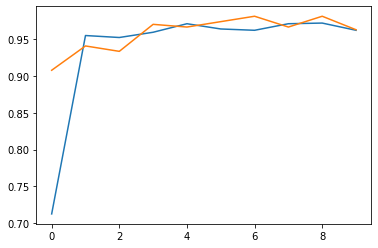

In [52]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='acc')

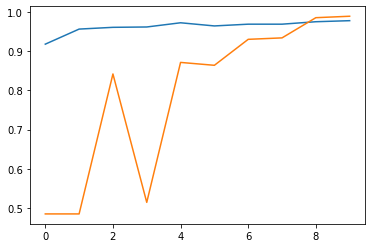

In [88]:
###batchnor
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='acc')

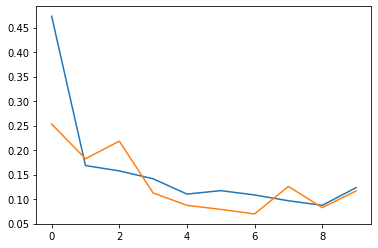

In [53]:
plt.plot(history.epoch,history.history.get('loss'),label='acc')
plt.plot(history.epoch,history.history.get('val_loss'),label='acc')

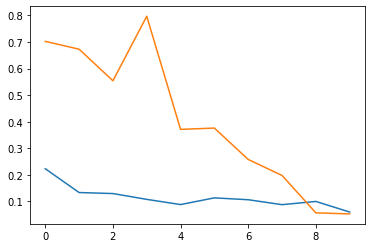

In [89]:
plt.plot(history.epoch,history.history.get('loss'),label='acc')
plt.plot(history.epoch,history.history.get('val_loss'),label='acc')

###模型預測

In [55]:
model.predict()

TypeError: predict() missing 1 required positional argument: 'x'

In [57]:
path='lake_009.jpg'

In [59]:
img=load_img(path)

In [64]:
img=tf.expand_dims(img,axis=0)

In [73]:
pre=model.predict(img)


In [77]:
pre[0][0]

1.0

In [78]:
index_to_label.get(pre[0][0])

'lake'

In [81]:
def per_img(img_path):
    img=load_img(path)
    img=tf.expand_dims(img,axis=0)
    pred=model.predict(img)
    print(index_to_label.get(pred[0][0]))

In [82]:
per_img('lake_009.jpg')

lake
